## 6.4: Supervised Machine Learning: Regression
#### 1.Importing libraries and data
#### 2.Data cleaning
#### 3.Data prep for regression analysis
#### 4.Regression analysis
#### Bonus: performance improvement after removing outliers

### 1.Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
##Python shortcut to folder path##
path = r'C:\Users\hazem\Master Folder- Airbnb Prices in European Cities'

In [4]:
## Importing Data Set ##
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'AirBnb_Europe_Clean.csv'), index_col = False)

### 2.Data cleaning

In [5]:
df_airbnb.shape

(51611, 14)

In [6]:
df_airbnb.columns

Index(['Unnamed: 0', 'city', 'days', 'accommodation', 'room_type',
       'person_capacity', 'cleanliness_rating', 'guest_rating', 'bedrooms',
       'city_distance', 'metro_distance', 'longitude', 'latitude',
       'Rating category'],
      dtype='object')

In [10]:
## Dropping 'Unnamed: 0' column 

df_airbnb = df_airbnb.drop(columns = ['Unnamed: 0'])

In [12]:
df_airbnb.head(20)

,city,days,accommodation,room_type,person_capacity,cleanliness_rating,guest_rating,bedrooms,city_distance,metro_distance,longitude,latitude,Rating category
0,Amsterdam,Weekdays,194,Private room,2,10,93,1,5.0,2.5,4.90569,52.41772,High rate
1,Amsterdam,Weekdays,344,Private room,4,8,85,1,0.5,0.2,4.90005,52.37432,Middle rate
2,Amsterdam,Weekdays,264,Private room,2,9,87,1,5.7,3.7,4.97512,52.36103,Middle rate
3,Amsterdam,Weekdays,434,Private room,4,9,90,2,0.4,0.4,4.89417,52.37663,High rate
4,Amsterdam,Weekdays,486,Private room,2,10,98,1,0.5,0.3,4.90051,52.37508,High rate
5,Amsterdam,Weekdays,553,Private room,3,8,100,2,2.1,1.9,4.87699,52.38966,High rate
6,Amsterdam,Weekdays,215,Private room,2,10,94,1,1.9,0.7,4.91570,52.38296,High rate
7,Amsterdam,Weekdays,2771,Entire home/apt,4,10,100,3,1.7,1.5,4.88467,52.38749,High rate
8,Amsterdam,Weekdays,1002,Entire home/apt,4,9,96,2,3.7,1.2,4.86459,52.40175,High rate
9,Amsterdam,Weekdays,277,Private room,2,10,88,1,3.1,0.9,4.87600,52.34700,Middle rate


In [13]:
# Check for missing values

df_airbnb.isnull().sum()

# No missing values found

city                  0
days                  0
accommodation         0
room_type             0
person_capacity       0
cleanliness_rating    0
guest_rating          0
bedrooms              0
city_distance         0
metro_distance        0
longitude             0
latitude              0
Rating category       0
dtype: int64

### 3.Data prep for regression analysis

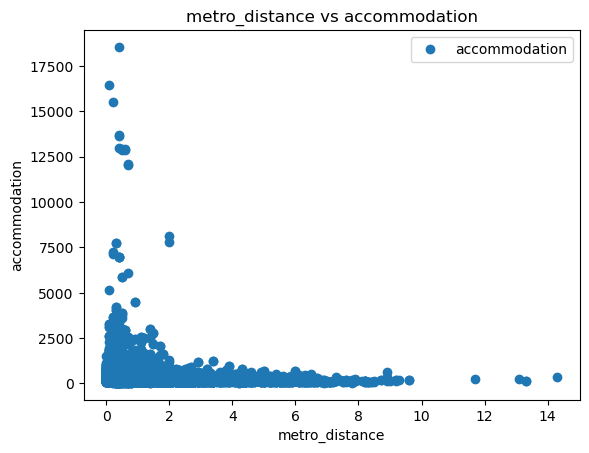

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airbnb.plot(x = 'metro_distance', y='accommodation',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('metro_distance vs accommodation')  
plt.xlabel('metro_distance')  
plt.ylabel('accommodation')  
plt.show()

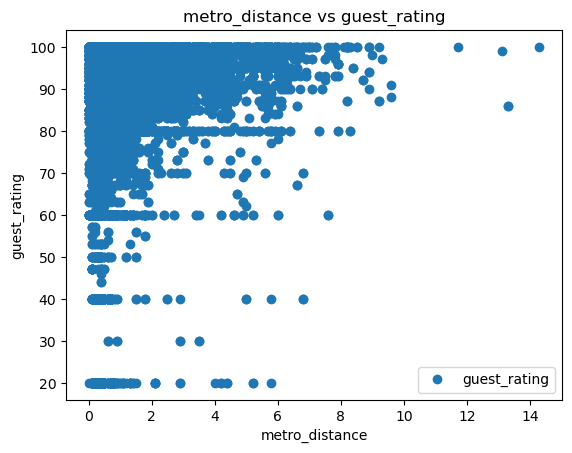

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_airbnb.plot(x = 'metro_distance', y='guest_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('metro_distance vs guest_rating')  
plt.xlabel('metro_distance')  
plt.ylabel('guest_rating')  
plt.show()

### Hypotheses:
##### “The shorter the distance to a metro station, the higher the accommodation.”
##### “The shorter the distance to a metro station, the higher the guest_rate.”

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_airbnb['metro_distance'].values.reshape(-1,1)
y = df_airbnb['accommodation'].values.reshape(-1,1)

In [19]:
X

array([[2.5],
       [0.2],
       [3.7],
       ...,
       [0.2],
       [0.3],
       [0.5]])

In [21]:
y

array([[194],
       [344],
       [264],
       ...,
       [637],
       [301],
       [133]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.Regression analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  
# This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

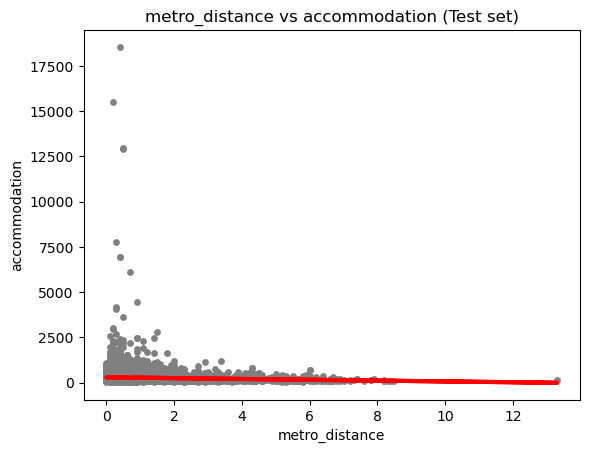

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('metro_distance vs accommodation (Test set)')
plot_test.xlabel('metro_distance')
plot_test.ylabel('accommodation')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-22.77561902]]
Mean squared error:  117621.6150552852
R2 score:  0.0036871402856422097


In [29]:
y_predicted

array([[281.66822842],
       [286.22335223],
       [283.94579032],
       ...,
       [247.50479989],
       [286.22335223],
       [277.11310462]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,267,281.668228
1,195,286.223352
2,213,283.945790
3,194,290.778476
4,132,290.778476
5,227,286.223352
6,118,290.778476
7,361,268.002857
8,521,293.056038
9,173,288.500914


#### Compare how the regression fits the training set

In [31]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-22.77561902]]
Mean squared error:  102887.84424263431
R2 score:  0.0038023161232053626


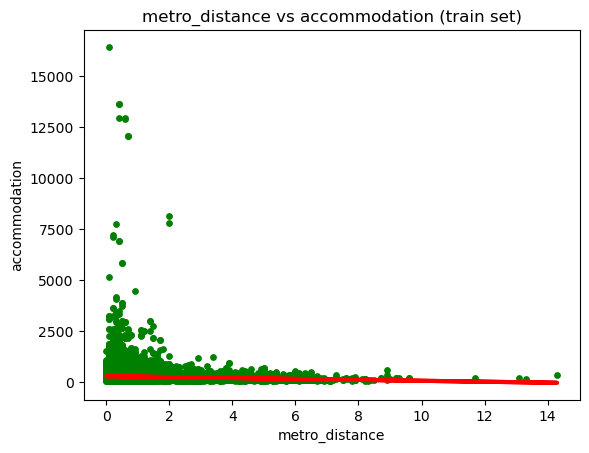

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('metro_distance vs accommodation (train set)')
plot_test.xlabel('metro_distance')
plot_test.ylabel('accommodation')
plot_test.show()

In [36]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_airbnb[df_airbnb['accommodation'] <=1000] 

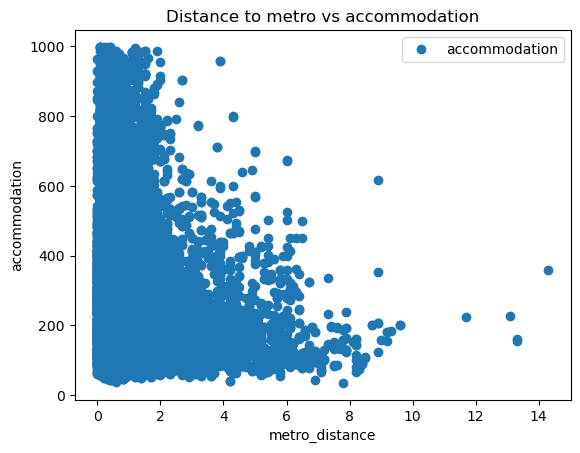

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'metro_distance', y='accommodation', style='o')  
plt.title('Distance to metro vs accommodation')  
plt.xlabel('metro_distance')  
plt.ylabel('accommodation')  
plt.show()

In [38]:
# Reshape again.

X_2 = df_test['metro_distance'].values.reshape(-1,1)
y_2 = df_test['accommodation'].values.reshape(-1,1)

In [39]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [40]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [42]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [43]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-17.29477333]]
Mean squared error:  25274.89636082643
R2 score:  0.008694614841440185


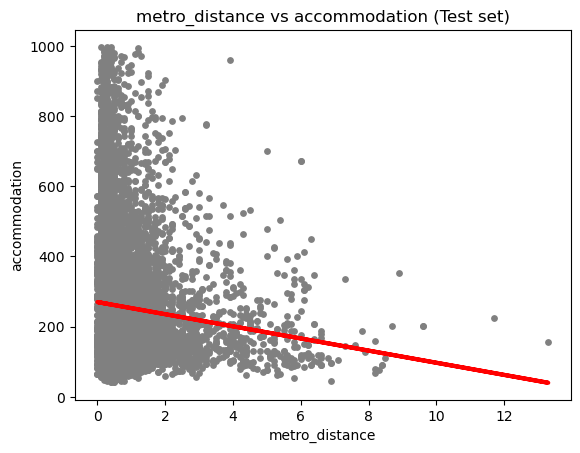

In [44]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('metro_distance vs accommodation (Test set)')
plot_test.xlabel('metro_distance')
plot_test.ylabel('accommodation')
plot_test.show()

In [45]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(20)

,Actual,Predicted
0,122,264.576137
1,242,266.305614
2,168,261.117182
3,205,235.175022
4,598,264.576137
5,242,259.387705
6,184,264.576137
7,104,217.880249
8,189,233.445545
9,162,261.117182


#### After checking, The linear regression looks acceptable but based on the big difference between actual and predicted values we Can't say it is a good-fitting modeL